# Health Insurance Cross Sell
### EDA on Health Insurance Owners' who will be interested in Vehicle Insurance

The data was obtained from [kaggle](https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction).

In this study, Explatory Data Analysis (EDA) will be performed to find any pattern and create visualizations to display any important features.

Here is context from the author:
#### Context
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

#### Data Desciption Table
| Varaible | Definition|
| --- | --- |
| id | Unique ID for the customer |
| Gender | Gender of the customer |
| Age | Age of the customer |
| Driving_License | 0 : Customer does not have DL, 1 : Customer already has DL |
| Region_Code | Unique code for the region of the customer |
| Previously_Insured | 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance |
| Vehicle_Age | Age of the Vehicle |
| Vehicle_Damage | 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past. |
| Annual_Premium | The amount customer needs to pay as premium in the year |
| PolicySalesChannel | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. |
| Vintage | Number of Days, Customer has been associated with the company |
| Response | 1 : Customer is interested, 0 : Customer is not interested |



In [1]:
# Call in libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from pandas.api.types import CategoricalDtype

%matplotlib inline

In [2]:
# Read the data
df = pd.read_csv("train.csv")

In [3]:
# See the dataframe
display(df.head())
display(df.shape)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


(381109, 12)

- There are total of 12 columns with 381109 rows in each column. Thus, there are 381109 people who are enrolled in the health insurance. 
- The currency in this dataset is in rupees (india).
- Vehicle_Age column has three types: < 1 Year (less than a year), 1-2 Year, and > 2 Years (greater than 2 years)

In [4]:
# Find missing data
display(df.isna().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There is no missing data in this dataset.

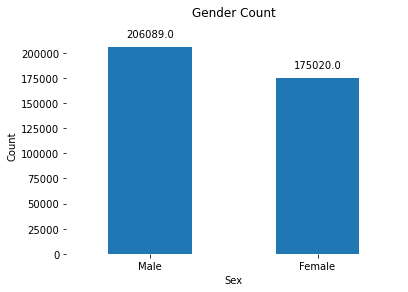

In [5]:
plt.figure()
ax = df["Gender"].value_counts().plot.bar()
ax.set_title("Gender Count", pad=20)
ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.set_frame_on(False)
ax.autoscale(False)
plt.xticks(rotation=0)


def add_value_labels(ax, spacing=8):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

In [6]:
df["Gender"].value_counts(normalize=True)

Male      0.540761
Female    0.459239
Name: Gender, dtype: float64

The data consists of 54% of Male and 46% of Female. Let's now take a look at age distribution.  

We will categorize the ages in group.  
To start, we will find the minimum and maximum age first

In [7]:
display("The minimum age is " + str(df.Age.min()))
display("The maximum age is " + str(df.Age.max()))

'The minimum age is 20'

'The maximum age is 85'

In [8]:
#df['AgeGroup']
df.loc[df["Age"].between(20,29),"AgeGroup"] = "20's"
df.loc[df["Age"].between(30,39),"AgeGroup"] = "30's"
df.loc[df["Age"].between(40,49),"AgeGroup"] = "40's"
df.loc[df["Age"].between(50,59),"AgeGroup"] = "50's"
df.loc[df["Age"].between(60,69),"AgeGroup"] = "60's"
df.loc[df["Age"].between(70,79),"AgeGroup"] = "70's"
df.loc[df["Age"].between(80,89),"AgeGroup"] = "80's"

In [9]:
# Change datatype to category
df["AgeGroup"] = pd.Categorical(df["AgeGroup"], ordered=True, categories=["20's","30's","40's","50's","60's","70's","80's"])
df["Vehicle_Age"] = pd.Categorical(df["Vehicle_Age"], ordered=True, categories=["< 1 Year", "1-2 Year", "> 2 Years"])

In [10]:
df["allOne"] = 1

In [11]:
pd.pivot_table(df, values = "allOne", index=["Gender","Vehicle_Age","Response"], columns=["AgeGroup"], aggfunc=np.sum)

AgeGroup                        20's     30's     40's     50's     60's  \
Gender Vehicle_Age Response                                                
Female < 1 Year    0         81100.0   6730.0    100.0     67.0     35.0   
                   1          2368.0    865.0     28.0     15.0      2.0   
       1-2 Year    0          2082.0  12951.0  22276.0  12283.0   8772.0   
                   1           527.0   3741.0   5563.0   2215.0    904.0   
       > 2 Years   0            20.0    273.0   1104.0   1091.0    959.0   
                   1             1.0    116.0    627.0    421.0    234.0   
Male   < 1 Year    0         62673.0   6542.0    177.0     97.0     42.0   
                   1          2761.0   1091.0     33.0     32.0      4.0   
       1-2 Year    0          2928.0  16518.0  35010.0  23779.0  14198.0   
                   1           708.0   4877.0   9010.0   4704.0   1579.0   
       > 2 Years   0            26.0    383.0   1860.0   2220.0   1692.0   
                   1             9.0    166.0   1058.0   1110.0    602.0   

AgeGroup                       70's   80's  
Gender Vehicle_Age Response                 
Female < 1 Year    0            9.0    1.0  
                   1            1.0    NaN  
       1-2 Year    0         5835.0  410.0  
                   1          405.0   28.0  
       > 2 Years   0          691.0   46.0  
                   1          117.0    7.0  
Male   < 1 Year    0           10.0    1.0  
                   1            2.0    NaN  
       1-2 Year    0         8001.0  467.0  
                   1          526.0   19.0  
       > 2 Years   0          892.0   48.0  
                   1          223.0   11.0

Both in male and female show that in 20's has the highest number of customers with health insurance and as well as highest number of not intersted with vehicle insurance.  
Then one might can ask, "Maybe it's because they already have one?" We will use the "Response" feature to determind whether the mentioned statement is true.

In [12]:
pd.pivot_table(df, values = "Previously_Insured", index=["Gender","Vehicle_Age","Response"], columns=["AgeGroup"], aggfunc=np.sum)

AgeGroup                        20's    30's     40's    50's    60's    70's  \
Gender Vehicle_Age Response                                                     
Female < 1 Year    0         57209.0  4499.0     22.0     5.0     7.0     1.0   
                   1            23.0     1.0      0.0     0.0     0.0     0.0   
       1-2 Year    0           562.0  5316.0   8422.0  5033.0  3937.0  2645.0   
                   1             3.0    17.0     10.0     3.0     3.0     2.0   
       > 2 Years   0             0.0     2.0      6.0     9.0     4.0     1.0   
                   1             0.0     0.0      0.0     0.0     0.0     0.0   
Male   < 1 Year    0         43301.0  4123.0     17.0     8.0     2.0     0.0   
                   1            31.0     7.0      0.0     0.0     0.0     0.0   
       1-2 Year    0           947.0  6392.0  12444.0  9025.0  6263.0  3795.0   
                   1             3.0    18.0     29.0     3.0     4.0     0.0   
       > 2 Years   0             0.0     3.0      8.0     5.0     4.0     3.0   
                   1             0.0     0.0      1.0     0.0     0.0     0.0   

AgeGroup                      80's  
Gender Vehicle_Age Response         
Female < 1 Year    0           1.0  
                   1           NaN  
       1-2 Year    0         206.0  
                   1           0.0  
       > 2 Years   0           0.0  
                   1           0.0  
Male   < 1 Year    0           0.0  
                   1           NaN  
       1-2 Year    0         243.0  
                   1           0.0  
       > 2 Years   0           0.0  
                   1           0.0

It looks like when the profile was created for each customer, it was not mandatory for the customer to fill out whether they have the vehicle insurance or not.   
The numbers do not sum up to 83468 compared to 57209 for female in 20's.   
However, we can still find that the reason the customers were not interested in vehicle insurance because they already have one can come off from our list.  
Female customers were still not interested whether they had the vehicle insurance previously or not. This finding also applies to the male customers.

In [13]:
np.round(pd.pivot_table(df, values = "Vintage", index=["Gender","Vehicle_Age","Response"], columns=["AgeGroup"], aggfunc=np.mean),1)

AgeGroup                      20's   30's   40's   50's   60's   70's   80's
Gender Vehicle_Age Response                                                 
Female < 1 Year    0         155.0  155.3  155.2  145.8  132.2  192.3  181.0
                   1         156.3  149.6  162.0  156.7  126.0   41.0    NaN
       1-2 Year    0         153.7  153.9  153.7  154.4  155.1  154.9  155.8
                   1         149.5  154.5  153.8  152.7  152.1  144.6  159.4
       > 2 Years   0         163.4  157.9  153.4  152.9  157.8  152.3  131.6
                   1          24.0  161.0  155.7  160.9  155.0  151.9  131.6
Male   < 1 Year    0         154.1  154.5  150.4  158.2  150.0  125.7  144.0
                   1         151.6  151.9  150.9  161.8  209.5  152.5    NaN
       1-2 Year    0         153.5  153.7  153.8  154.0  155.2  154.3  155.0
                   1         156.8  155.8  154.1  156.2  152.8  146.6  148.9
       > 2 Years   0         151.7  143.0  155.2  154.0  157.0  153.7  147.0
                   1         191.9  150.5  158.2  154.3  150.9  148.5  169.3

The above pivot table shows the average days the customers have been with the company.  
The average days for the customers with the company are around 150 days.  
Many customers became interested with vehicle insurnace around 150 days as well.  
Did this company recently open? Also/ or, was there a promotion in the fifth month of the enrollement?

"The minimum day for female customers in 20's with this company is 10"

"The maximum day for female customers in 20's with this company is 299"

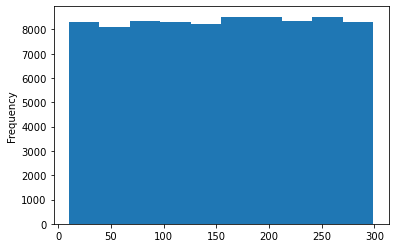

In [14]:
female = df[df["Gender"] == "Female"].copy()
female20_1y = female[(female["AgeGroup"] == "20's") & (female["Vehicle_Age"] == "< 1 Year")]
display("The minimum day for female customers in 20's with this company is " + str(min(female20_1y.Vintage)))
display("The maximum day for female customers in 20's with this company is " + str(max(female20_1y.Vintage)))
print("")
display(female20_1y.Vintage.plot.hist())

It's close to a uniform distribution for female customer in 20s. What about the only for the female customers who are interested in vehicle insurance as well?

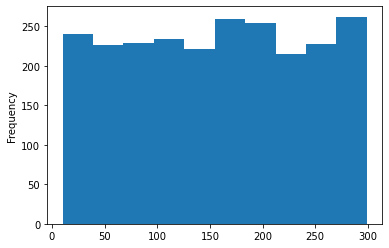

In [15]:
female20_1y[female20_1y.Response == 1]["Vintage"].plot.hist()

We also observe that female customer (20s and < 1 year) are interested throughout their time with this company.

"The minimum day for female customers in 20's with this company is 10"

"The maximum day for female customers in 20's with this company is 299"

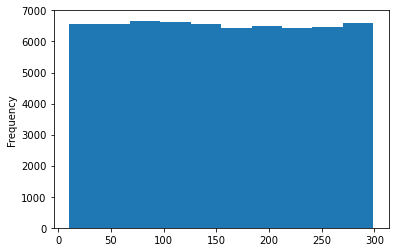

In [16]:
male = df[df["Gender"] == "Male"].copy()
male20_1y = male[(male["AgeGroup"] == "20's") & (male["Vehicle_Age"] == "< 1 Year")]
display("The minimum day for female customers in 20's with this company is " + str(min(male20_1y.Vintage)))
display("The maximum day for female customers in 20's with this company is " + str(max(male20_1y.Vintage)))
print("")
display(male20_1y.Vintage.plot.hist())

Same plots were made for all ages for customers. They all have union distributions.

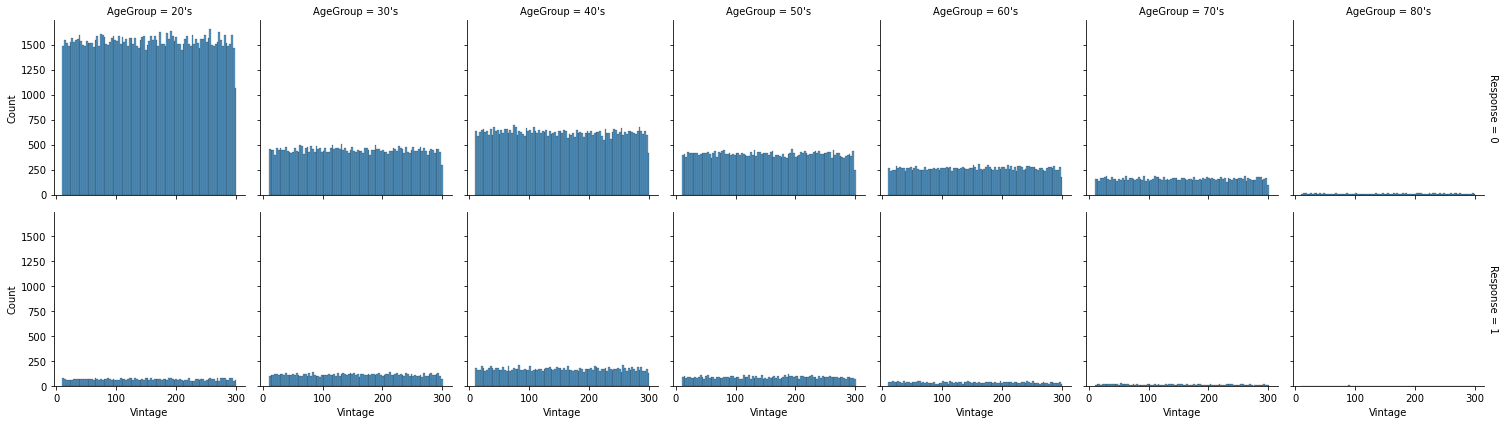

In [17]:
sns.displot(df, x="Vintage", col="AgeGroup", row="Response", binwidth=3, height=3, facet_kws=dict(margin_titles=True))

The male customers' minimum and maximum days are same as female.  
As Indian community average age for marriage is in early 20's (Dutta, 2020) and as their income increases over the years (Average Salary Survey), like most families, parents have responsibilities to take care of the family and get better income as they gain experience.
Customrs in the 40's were most interested in vehicle insurance compared with other ages and we see 30's and 50's the next and 20's with less interest compared with the above age groups.  
Customers in their 40's are parents who would concern about the cost of vehicle repair or even life insurance to avoid passing financial burden to their family member. Thus, they seem to be more interested in any timeline when the question was made to them if they are interested in vehicle insurance. 30's were next because their children are growing and they have more financial responsibilities compared when they were in 20's. 50's are less interested compared to 40's as their children are adults who can support themselves. 20's with lowest interest compared to other three groups because they just started their career and most likely want to save as much as they can to purchase home or pay for their wedding.

In [18]:
df["Driving_License"].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

812 customers do not hold driver license number. Does this group also interested obtaining vehicle insurance?

In [19]:
df[df["Driving_License"] == 0]["Response"].value_counts()

0    771
1     41
Name: Response, dtype: int64

Three are 41 customers who are interested in vehicle insurance.

In [20]:
fourtyone = df[df["Driving_License"] == 0].copy()
fourtyone = fourtyone[fourtyone.Response == 1]
fourtyone.AgeGroup.value_counts()

50's    19
60's    14
70's     4
40's     4
80's     0
30's     0
20's     0
Name: AgeGroup, dtype: int64

Older generation who do not hold driver license were intersted in vehicle insurance

# Group by location

In [21]:
location = np.round(df.groupby(["Region_Code"]).agg({"Annual_Premium":"mean", "Response":"sum", "allOne":"count"}).reset_index(),0)

In [22]:
location["Perc.(%)"] = round(location["Response"]/location["allOne"] *100,1)
location.rename(columns={"allOne":"Customer_Num."}, inplace=True)

In [23]:
pd.set_option('display.max_rows', 30)
location

,Region_Code,Annual_Premium,Response,Customer_Num.,Perc.(%)
0,0.0,3048.0,174,2021,8.6
1,1.0,2711.0,109,1008,10.8
2,2.0,26955.0,287,4038,7.1
3,3.0,24524.0,1181,9251,12.8
4,4.0,23596.0,285,1801,15.8
...,...,...,...,...,...
48,48.0,2697.0,477,4681,10.2
49,49.0,23545.0,137,1832,7.5
50,50.0,30955.0,642,10243,6.3
51,51.0,28013.0,28,183,15.3


In [43]:
location.sort_values("Perc.(%)", ascending=False).head(20)

,Region_Code,Annual_Premium,Response,Customer_Num.,Perc.(%)
38,38.0,23396.0,389,2026,19.2
28,28.0,38669.0,19917,106415,18.7
19,19.0,26575.0,250,1535,16.3
4,4.0,23596.0,285,1801,15.8
51,51.0,28013.0,28,183,15.3
23,23.0,23275.0,300,1960,15.3
24,24.0,25768.0,342,2415,14.2
18,18.0,26812.0,678,5153,13.2
7,7.0,25466.0,432,3279,13.2
3,3.0,24524.0,1181,9251,12.8


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 <a list of 53 Text major ticklabel objects>)

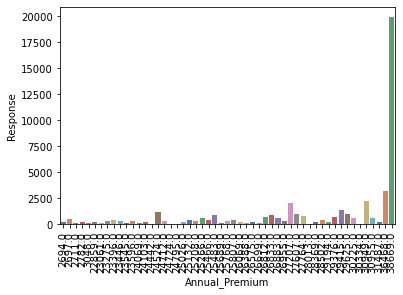

In [29]:
# sns.displot(, x="Annual_Premium", col="Response", binwidth=3, height=3)
sns.barplot(x=location["Annual_Premium"], y=location["Response"], palette="deep")
plt.xticks(rotation=90)

In [44]:
Annual_premium_response = location.groupby("Annual_Premium").agg({"Response":"sum"}).sort_values(by=["Response"], ascending = False)
Annual_premium_response.head(20)

,Response
Annual_Premium,
38669.0,19917
36468.0,3257
30949.0,2224
27207.0,2032
29415.0,1365
24524.0,1181
27607.0,1041
29625.0,958
25483.0,900


In [28]:
display(location["Perc.(%)"].mean())
display(location["Customer_Num."].sum())

10.086792452830187

381109

Overall with an average of 10% health insurance customers are interested in vehicle insurance. People who paid the most expensive annual premium (average = 38669 rps) are interest in vehicle insurance far exceeding (N=19917) to any other annual health insurance subscribers. This same group is also the 2nd highest in the region with the 18.7% response with interest.

# Group by "PolicySalesChannel"

In [53]:
channel = np.round(df.groupby(["Policy_Sales_Channel"]).agg({"Response":"sum", "allOne":"count"}).reset_index(),0).sort_values("Response", ascending=False)
channel["Perc(%)"] = round(channel["Response"] / channel["allOne"] *100,0)
channel.rename(columns={"allOne":"Customer_Num."}, inplace=True)
display(channel.sort_values("Response", ascending=False).head(20))
display(channel.shape)

,Policy_Sales_Channel,Response,Customer_Num.,Perc(%)
24,26.0,15891,79700,20.0
119,124.0,13996,73995,19.0
145,152.0,3858,134784,3.0
149,156.0,2297,10661,22.0
150,157.0,1794,6684,27.0
117,122.0,1720,9930,17.0
147,154.0,1474,5993,25.0
154,163.0,880,2893,30.0
153,160.0,475,21779,2.0
148,155.0,395,1234,32.0


(155, 4)

This company used 155 ways to reach out to the customer. Out of 155, only a few were effective (15% >). The company needs to focus on the higher yield approach to be cost effective as well as success in selling the vehicle insurance.

# Summary
In summary, we observed that people who were mostly interested in vehicle insurance are in 40's.  
People who are most interested in vehicle insurance are the people with highest annual premium fee.  
The most number of responses were using channel 24 (N=15891, 20%) and 119 (N=13996, 19%). Channel 149 (N=2297, 22% resoponse), 150 (N=1794, 27%), 147 (N=1474, 25%), and 154 (N=880, 30%) should be considered to be used for better marketing approach. However, I do not have the information how much each channel cost to deliver the message to the customer. For example, if channel 24 (20% response) spent \\$1 for each delivery and channel 154 (30% reponse) spent \\$3, it is not worth to change the marketing strategy. (This also depends on the budget of the market campaign).

### Citation

Dutta, T. (2020, August 31). India considers raising marriage age. Retrieved October 28, 2020, from https://www.thenationalnews.com/world/asia/india-considers-raising-marriage-age-1.1070867
India: 2019/20 Average Salary Survey. (n.d.). Retrieved October 28, 2020, from https://www.averagesalarysurvey.com/india